In [1]:
from pandas import read_csv as read
import pandas as pd
import random
import numpy as np
import seaborn as sns; sns.set(color_codes=True)
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from plot import pltPRcurve, pltROCcurve 

In [11]:
path = "newFilt.csv"
data = read(path, delimiter=",")

data.drop('isFlaggedFraud', axis=1, inplace=True)
data.drop('nameOrig', axis=1, inplace=True)
data.drop('nameDest', axis=1, inplace=True)

data.drop('step', axis=1, inplace=True)
data.drop('newbalanceOrig', axis=1, inplace=True)
data.drop('newbalanceDest', axis=1, inplace=True)
data.drop('hour', axis=1, inplace=True)
data.drop('newSender', axis=1, inplace=True)
data.drop('newReceiver', axis=1, inplace=True)
data.drop('merchant', axis=1, inplace=True)
data.drop('fraudsEarly', axis=1, inplace=True)
data.drop('LTS', axis=1, inplace=True)
data.drop('LTR', axis=1, inplace=True)
data.drop('oldbalanceOrg', axis=1, inplace=True)
##data.drop('newbalanceDest', axis=1, inplace=True)
##data.drop('oldbalanceDest', axis=1, inplace=True)

##data = pd.get_dummies(data)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['type'] = le.fit_transform(data['type'])

data.head()

target = data['isFraud']

target.head()

train = data.drop('isFraud', axis=1)

train.head()

,type,amount,oldbalanceDest,IZoB
0,3,9839.64,0.0,0
1,4,181.00,0.0,1
2,1,181.00,21182.0,1
3,3,9478.39,0.0,0
4,3,3454.08,0.0,0


In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

kfold = 5
itog_val = {}

print('Количество шагов кросс-валидации = ', kfold)

Количество шагов кросс-валидации =  5


In [13]:
model = RandomForestClassifier(n_estimators=110, n_jobs=-1)
 
name = type(model).__name__

scores = cross_val_score(model, train, target, cv = kfold)
itog_val[name] = scores.min()

print (f'Точность {name} на каждом шаге:')
print (scores)


Точность RandomForestClassifier на каждом шаге:
[0.95875556 0.95857778 0.95977599 0.95919637 0.96044093]


In [14]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)
name = type(model).__name__

scores = cross_val_score(model, train, target, cv = kfold)
itog_val[name] = scores.min()

print (f'Точность {name} на каждом шаге:')
print (scores)

Точность KNeighborsClassifier на каждом шаге:
[0.934      0.93386667 0.93510823 0.9266157  0.93390524]


In [15]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

name = type(model).__name__

scores = cross_val_score(model, train, target, cv = kfold)
itog_val[name] = scores.min()

print (f'Точность {name} на каждом шаге:')
print (scores)

Точность GaussianNB на каждом шаге:
[0.9372     0.93933333 0.94030846 0.92221531 0.93648324]


In [16]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(max_depth=4)

name = type(model).__name__

scores = cross_val_score(model, train, target, cv = kfold)
itog_val[name] = scores.min()

print (f'Точность {name} на каждом шаге:')
print (scores)

Точность GradientBoostingClassifier на каждом шаге:
[0.96862222 0.96853333 0.9696431  0.97013068 0.97013068]


In [13]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

name = type(model).__name__

scores = cross_val_score(model, train, target, cv = kfold)
itog_val[name] = scores.min()

print (f'Точность {name} на каждом шаге:')
print (scores)

Точность DecisionTreeClassifier на каждом шаге:
[0.99445392 0.99626706 0.9968     0.99637333 0.99712    0.99733305
 0.99637295 0.99839983 0.99733305 0.9965863  0.99733305 0.99647962]


In [12]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(alpha=1, max_iter=1000)

name = type(model).__name__

scores = cross_val_score(model, train, target, cv = kfold)
itog_val[name] = scores.min()

print (f'Точность {name} на каждом шаге:')
print (scores)

Точность MLPClassifier на каждом шаге:
[0.96235068 0.97792235 0.96096    0.93664    0.97248    0.84467677
 0.949968   0.80477918 0.97482398 0.90046938 0.90537657 0.92703222]


,0
RandomForestClassifier,0.990506
KNeighborsClassifier,0.985068
GaussianNB,0.912844
GradientBoostingClassifier,0.988908
DecisionTreeClassifier,0.994454
MLPClassifier,0.804779


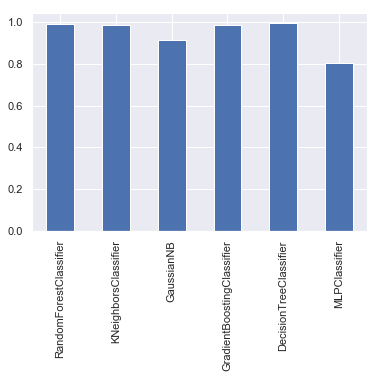

In [14]:
df = pd.DataFrame.from_dict(data = itog_val, orient='index')

df.plot(kind='bar', legend=False)

df